# On main branch, this file should be non executed and no parameters set.
# On dev_ branch, it must be fully executed and must include tests.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

import estimate_critical_q as est_qc
import estimate_exponents as est_exps
import tools

## Notebook Parameters

In [3]:
# Set the filename of the database and the visibility parameter v
# Example: 
#
# db_path = 'test__phys_quant.csv'
# v = 0.5
# 
# OBS: At the development time the file test__full.csv was a copy of
# results_databases/bubble_filtering__8_neighbors_squared_network__MXU.csv

db_path = 'test__full.csv'
v = 0.35

## Functions

In [4]:
#express_measure_with_error(0.98, 0.099)

In [5]:
#express_measure_with_error(1234, 43)

In [6]:
#express_measure_with_error(0.98, 0.099, 'A')

In [7]:
#express_measure_with_error(1234, 43, 'A')

## Main
At the normal uses, the below code should not be changed.

In [8]:
# Read the physical quantities database
full = pd.read_csv(db_path, index_col=0)

# Select the data corresponding to the given visibility v.
phys_quant = full[full.v == v]

# Get the number of sites
N = phys_quant.N.unique()

# Set the index to N and q
phys_quant.set_index(['N','q'], inplace=True)

print('N =', N)

N = [  400  1600  3600  6400 10000]


In [9]:
phys_quant.head()

v         M     M_err   M_noMod  M_noMod_err         X  \
N   q                                                                   
400 0.0000  0.35  0.929314  0.001175  0.929314     0.001175  0.470031   
    0.0025  0.35  0.915629  0.001568  0.915629     0.001568  0.627140   
    0.0050  0.35  0.901901  0.001968  0.901901     0.001968  0.787014   
    0.0075  0.35  0.886529  0.002789  0.886529     0.002789  1.115617   
    0.0100  0.35  0.869761  0.003461  0.869761     0.003461  1.384395   

             X_noMod         U         u  
N   q                                     
400 0.0000  0.470031  0.664950  5.962067  
    0.0025  0.627140  0.664346  5.660639  
    0.0050  0.787014  0.663687  5.410414  
    0.0075  1.115617  0.662522  5.080487  
    0.0100  1.384395  0.661338  4.829217

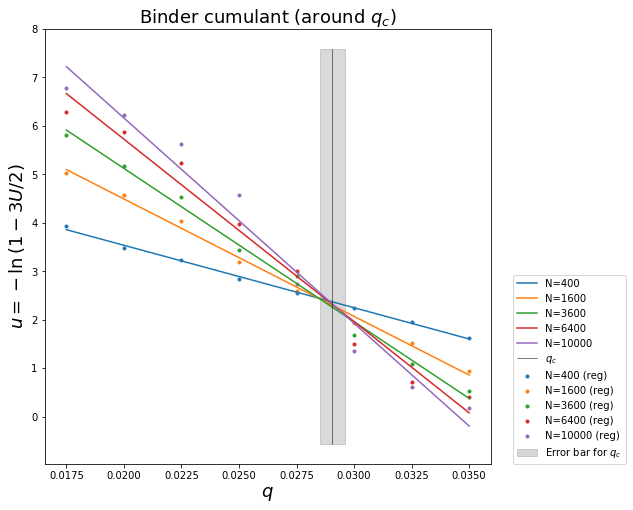



CRITICAL POINT

       q_c = 0.029050 ± 0.000536


In [10]:
qc, qc_error, best_regs, binder = est_qc.estimate(N[:], phys_quant, 
                                               #min_half_bandwidth=1,
                                               #max_half_bandwidth=3,
                                               do_plot=True)

In [11]:
qc

0.02905032171437636

In [12]:
qc_error

0.0005356842792635562

In [13]:
binder

,q,400,1600,3600,6400,10000
7,0.0175,3.938612,5.025131,5.802473,6.284059,6.786119
8,0.0200,3.478160,4.577541,5.178004,5.865062,6.228353
9,0.0225,3.228392,4.042514,4.535183,5.223840,5.628116
10,0.0250,2.833270,3.191273,3.446837,3.984557,4.582993
11,0.0275,2.544097,2.601975,2.893662,3.009644,2.734407
12,0.0300,2.243061,1.934210,1.680192,1.489736,1.360769
13,0.0325,1.943920,1.514971,1.080334,0.714635,0.605069
14,0.0350,1.631576,0.931930,0.538170,0.408093,0.181591


In [14]:
best_regs

,qi,qf,coef,interc,R2
N,,,,,
400,0.0175,0.035,-128.883878,6.113338,0.996510
1600,0.0175,0.035,-242.283182,9.337377,0.995050
3600,0.0175,0.035,-316.460070,11.451434,0.992538
6400,0.0175,0.035,-376.481560,13.255094,0.978585
10000,0.0175,0.035,-423.803524,14.638270,0.972159


In [15]:
tools.express_measure_with_error(qc, qc_error, label="q_c")

'q_c = 0.0291 ± 0.0005'

Para testar vou ter de salvar uns csv com nome que inicia em test__
e confiar que meu codigo aqui está correto.
Aparentente está pois tem concordância razoável com o código que eu
usava antes.

Uma ideia também é eu fornecer o intervalo de valores de q ao invés de
calcular automaticamente. Isso é bom para testes de coerência.

As variaveis min_half_bandwith and max_half_bandwidth tem algo de incoerente entre si. Talvez fosse bom investigar isso.

## Set the same value ('L' or 'N' ) for the parameter 'scale_var' in below method calls.

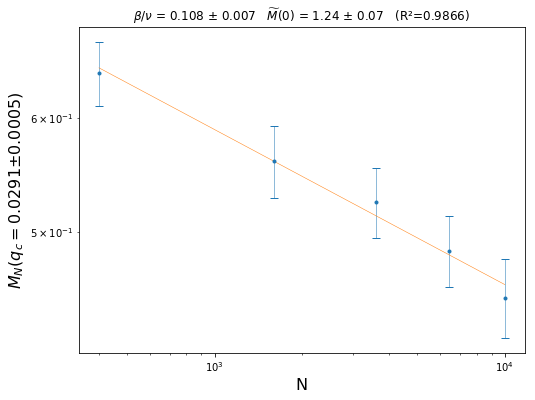

In [16]:
beta_nu, beta_nu_err, _1, _2, _3 = est_exps.estimate_exponent(
                                    'beta_nu', qc, qc_error, N[:], 
                                    phys_quant, scale_var='N')

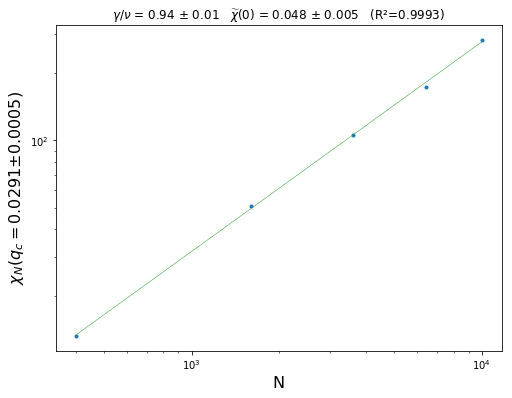

In [17]:
gamma_nu, gamma_nu_err, _1, _2, _3 = est_exps.estimate_exponent(
                                    'gamma_nu', qc, qc_error, N[:], 
                                    phys_quant, scale_var='N')

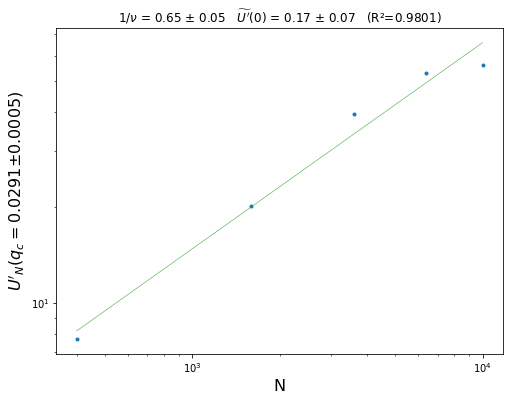

In [18]:
inv_nu, inv_nu_err, _1, _2, _3 = est_exps.estimate_exponent(
                                    'inv_nu', qc, qc_error, N[:], 
                                    phys_quant, scale_var='N')


In [19]:
D, D_err = est_exps.estimate_D(beta_nu, beta_nu_err, 
                               gamma_nu, gamma_nu_err)
print(tools.express_measure_with_error(D, D_err, label='D'))

D = 1.16 ± 0.03


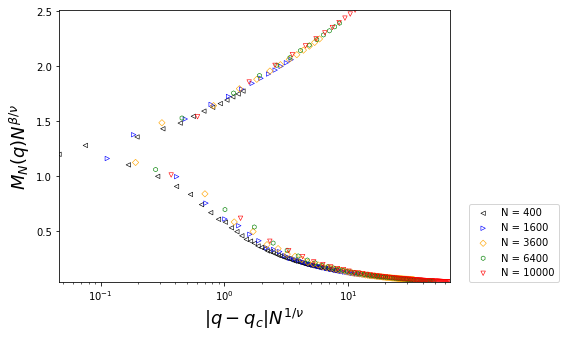

In [28]:
est_exps.data_collapse(qc, beta_nu, gamma_nu, inv_nu, N[:],
              phys_quant, scale_var='N', quantities_labels=['M'])
#plt.xlim(-10,10)
#plt.yscale('log')

<br><br>
## Testing

In [21]:
import pandas as pd
import unittest
import estimate_critical_q as est

class Test_estimate_critical_q(unittest.TestCase):
    
    '''
    The test cases included here runs only for the data in the
    
    bubble_filtering__8_neighbors_squared_network__MXU.csv
    
    dataset. It is not easy to include cases because it relies on
    visual inspection of the binder cumulant plot.
    
    '''
    
    def prepare_data(self, v):
        
        # Select the data corresponding to the given visibility v.
        # and set the index to N and q
        phys_quant = full[full.v == v]
        phys_quant.set_index(['N','q'], inplace=True)
        
        return phys_quant
        
        
    # test for v = 1.00
    def test_v_100(self):
        f = est.find_qc_candidate
        phys_quant = self.prepare_data(1.00)
        self.assertEqual(f(  400, 1600,phys_quant), 0.1425)
        self.assertEqual(f(  400, 3600,phys_quant), 0.1450)
        self.assertEqual(f(  400, 6400,phys_quant), 0.1425)
        self.assertEqual(f(  400,10000,phys_quant), 0.1425)
        self.assertEqual(f( 1600, 3600,phys_quant), 0.1450)
        self.assertEqual(f( 1600, 6400,phys_quant), 0.1450)
        self.assertEqual(f( 1600,10000,phys_quant), 0.1425)
        self.assertEqual(f( 3600, 6400,phys_quant), 0.1425)
        self.assertEqual(f( 3600,10000,phys_quant), 0.1425)
        self.assertEqual(f( 6400,10000,phys_quant), 0.1425)
        
    # test for v = 0.50
    def test_v_050(self):
        f = est.find_qc_candidate
        phys_quant = self.prepare_data(0.50)
        self.assertEqual(f(  400, 1600,phys_quant), 0.0800)
        self.assertEqual(f(  400, 3600,phys_quant), 0.0775)
        self.assertEqual(f(  400, 6400,phys_quant), 0.0800)
        self.assertEqual(f(  400,10000,phys_quant), 0.0775)
        self.assertEqual(f( 1600, 3600,phys_quant), 0.0775)
        self.assertEqual(f( 1600, 6400,phys_quant), 0.0800)
        self.assertEqual(f( 1600,10000,phys_quant), 0.0775)
        self.assertEqual(f( 3600, 6400,phys_quant), 0.0800)
        self.assertEqual(f( 3600,10000,phys_quant), 0.0775)
        self.assertEqual(f( 6400,10000,phys_quant), 0.0725)
        

        # test for v = 0.25
    def test_v_025(self):
        f = est.find_qc_candidate
        phys_quant = self.prepare_data(0.25)
        self.assertEqual(f(  400, 1600,phys_quant), None)
        self.assertEqual(f(  400, 3600,phys_quant), None)
        self.assertEqual(f(  400, 6400,phys_quant), None)
        self.assertEqual(f(  400,10000,phys_quant), None)
        self.assertEqual(f( 1600, 3600,phys_quant), 0.002)
        self.assertEqual(f( 1600, 6400,phys_quant), 0.002)
        self.assertEqual(f( 1600,10000,phys_quant), 0.0005)
        self.assertEqual(f( 3600, 6400,phys_quant), 0.0005)
        self.assertEqual(f( 3600,10000,phys_quant), 0.0005)
        self.assertEqual(f( 6400,10000,phys_quant), 0.0015)

In [22]:
db_path = 'test__full.csv'

# Read the physical quantities database
full = pd.read_csv(db_path, index_col=0)

# Run the tests
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.061s

OK
